# Курсовая работа
## Выполнил студент группы БФИ2202 Ковалёв Андрей

Написать программу, которая будет считывать данные из CSV файла, содержащего
информацию о продажах товаров в магазине. Данные в файле содержатся в следующем
формате:
| Номер заказа | Дата заказа | Название товара | Категория товара | Количество продаж | Цена
за единицу | Общая стоимость |
Необходимо:
1. Рассчитать общую выручку магазина.
2. Найти товар, который был продан наибольшее количество раз.
3. Найти товар, который принес наибольшую выручку.
4. Составить отчет, содержащий информацию об общей выручке магазина, количестве
проданных единиц каждого товар и доле каждого товара в общей выручке.
Для решения задач необходимо использовать структуры данных, такие как массивы и
хеш-таблицы, а также различные алгоритмы обработки данных, например, сортировку и поиск.
Также необходимо учитывать возможные ошибки ввода-вывода и обрабатывать их в
соответствии с требованиями

# Ход работы:

Подлкючим необходимые библиотеки для работы:

In [1]:
import csv
import matplotlib.pyplot as plt

Создадим класс хэш-таблицы:

In [3]:
class HashTable:
    def __init__(self):
        self.table = {}

    def insert(self, key, value):
        if key not in self.table:
            self.table[key] = []
        self.table[key].append(value)

    def get(self, key):
        if key in self.table:
            return self.table[key]
        else:
            return None

    def remove(self, key, value):
        if key in self.table and value in self.table[key]:
            self.table[key].remove(value)
            if not self.table[key]:
                del self.table[key]
            print(f"Элемент {value} успешно удален из хеш-таблицы.")
        else:
            print("Указанный элемент не найден в хеш-таблице.")


Функция быстрой сортировки

In [2]:
def quicksort(arr, key):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2][key]
    left = [x for x in arr if x[key] < pivot]
    middle = [x for x in arr if x[key] == pivot]
    right = [x for x in arr if x[key] > pivot]
    return quicksort(left, key) + middle + quicksort(right, key)

Функция для чтения данных из CSV файла

In [4]:
def read_csv(file_name):
    data = []
    try:
        with open(file_name, 'r', newline='', encoding='utf-8') as csvfile:
            csvreader = csv.DictReader(csvfile)
            for row in csvreader:
                data.append({
                    'Номер заказа': int(row['Номер заказа']),
                    'Дата заказа': row['Дата заказа'],
                    'Название товара': row['Название товара'],
                    'Категория товара': row['Категория товара'],
                    'Количество продаж': int(row['Количество продаж']),
                    'Цена за единицу': float(row['Цена за единицу']),
                    'Общая стоимость': float(row['Общая стоимость'])
                })
    except Exception as e:
        print(f"Ошибка чтения файла - {file_name}: {e}")
    return data

file_name = 'laptop.csv'
sales_data = read_csv(file_name)
for record in sales_data:
    print(record)


{'Номер заказа': 1, 'Дата заказа': '2024-05-21', 'Название товара': 'Apple MacBook Air', 'Категория товара': 'Ноутбуки', 'Количество продаж': 3, 'Цена за единицу': 89910.0, 'Общая стоимость': 269730.0}
{'Номер заказа': 2, 'Дата заказа': '2024-05-22', 'Название товара': 'Dell Inspiron 15', 'Категория товара': 'Ноутбуки', 'Количество продаж': 4, 'Цена за единицу': 49410.0, 'Общая стоимость': 197640.0}
{'Номер заказа': 3, 'Дата заказа': '2024-05-23', 'Название товара': 'HP Pavilion 14', 'Категория товара': 'Ноутбуки', 'Количество продаж': 2, 'Цена за единицу': 58410.0, 'Общая стоимость': 116820.0}
{'Номер заказа': 4, 'Дата заказа': '2024-05-24', 'Название товара': 'Lenovo Yoga 7i', 'Категория товара': 'Ноутбуки', 'Количество продаж': 1, 'Цена за единицу': 80910.0, 'Общая стоимость': 80910.0}
{'Номер заказа': 5, 'Дата заказа': '2024-05-25', 'Название товара': 'Acer Aspire 5', 'Категория товара': 'Ноутбуки', 'Количество продаж': 5, 'Цена за единицу': 44910.0, 'Общая стоимость': 224550.0}
{'

Общая выручка магазина

In [6]:
total_revenue = sum(record['Общая стоимость'] for record in sales_data)
print(f"Общая выручка магазина: {total_revenue} RUB")

Общая выручка магазина: 1976570.0 RUB


Товар который был продан наибольшее количество раз

In [9]:
def find_max_sales_product(sales_data):
    sales_count = {}
    for record in sales_data:
        product = record['Название товара']
        if product in sales_count:
            sales_count[product] += record['Количество продаж']
        else:
            sales_count[product] = record['Количество продаж']
    max_sales_product = max(sales_count, key=sales_count.get)
    return max_sales_product, sales_count[max_sales_product]

# Найти товар, который был продан наибольшее количество раз
max_sales_product, max_sales_count = find_max_sales_product(sales_data)
print(f"Товар, который был продан наибольшее количество раз: {max_sales_product} ({max_sales_count} шт.)")


Товар, который был продан наибольшее количество раз: Acer Aspire 5 (5 шт.)


Товар который принес наибольшую выручку

In [8]:
def find_max_revenue_product(sales_data):
    revenue_per_product = {}
    for record in sales_data:
        product = record['Название товара']
        if product in revenue_per_product:
            revenue_per_product[product] += record['Общая стоимость']
        else:
            revenue_per_product[product] = record['Общая стоимость']
    max_revenue_product = max(revenue_per_product, key=revenue_per_product.get)
    return max_revenue_product, revenue_per_product[max_revenue_product]

# Найти товар, который принес наибольшую выручку
max_revenue_product, max_revenue = find_max_revenue_product(sales_data)
print(f"Товар, который принес наибольшую выручку: {max_revenue_product} ({max_revenue} RUB)")


Товар, который принес наибольшую выручку: Samsung Galaxy Book Pro (359640.0 RUB)


Полный отчёт

Общая выручка магазина: 1976570 руб.

Товар, который был продан наибольшее количество раз:
Название товара: Acer Aspire 5, Количество продаж: 5

Товар, который принес наибольшую выручку:
Название товара: Samsung Galaxy Book Pro, Общая выручка: 359640 руб.

Отчет по товарам:
Название товара: Lenovo Yoga 7i, Количество продаж: 1, Общая выручка: 80910 руб., Доля в общей выручке (%): 4.09%
Название товара: HP Pavilion 14, Количество продаж: 2, Общая выручка: 116820 руб., Доля в общей выручке (%): 5.91%
Название товара: Microsoft Surface Laptop Go, Количество продаж: 2, Общая выручка: 143820 руб., Доля в общей выручке (%): 7.28%
Название товара: Razer Blade 15, Количество продаж: 1, Общая выручка: 152910 руб., Доля в общей выручке (%): 7.74%
Название товара: Asus VivoBook 15, Количество продаж: 3, Общая выручка: 160730 руб., Доля в общей выручке (%): 8.13%
Название товара: Dell Inspiron 15, Количество продаж: 4, Общая выручка: 197640 руб., Доля в общей выручке (%): 10.00%
Название товара: A

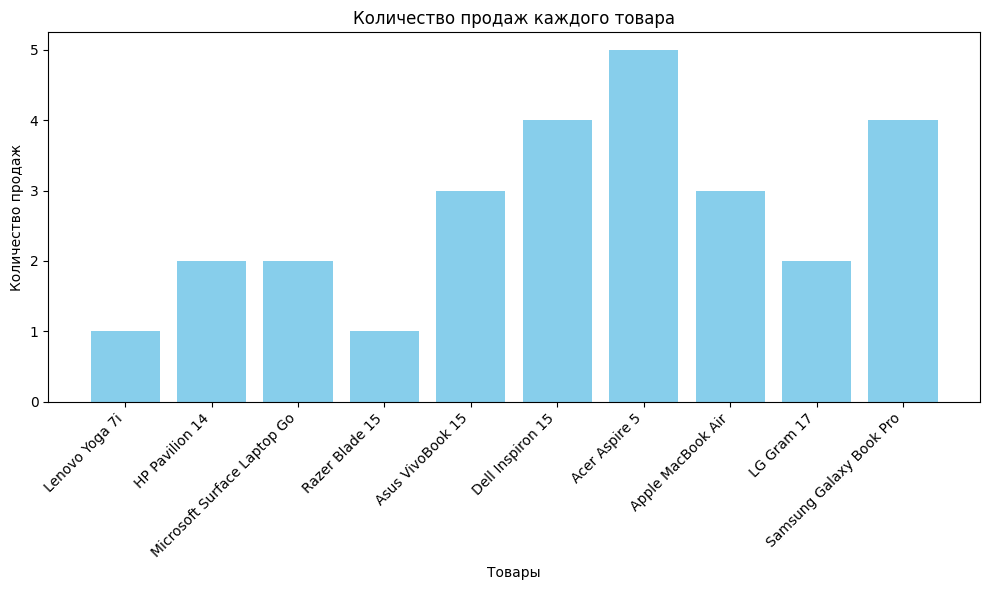

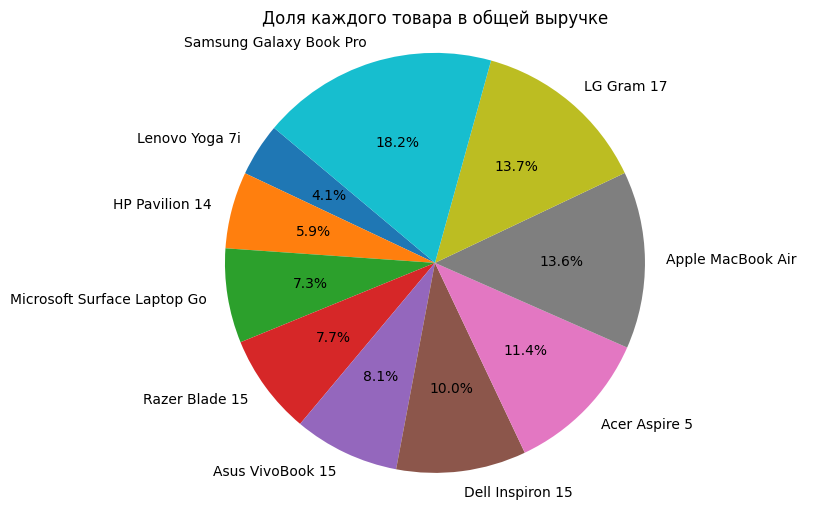

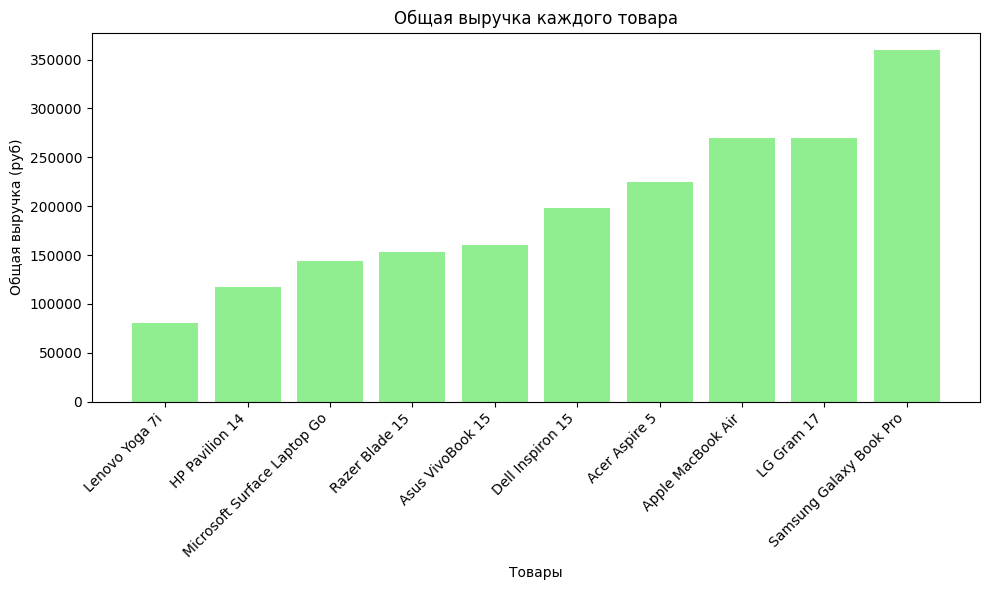

In [16]:
def calculate_sales(data):
    # Инициализация переменных для общей выручки и хеш-таблиц для хранения количества продаж и выручки по товарам
    total_revenue = 0
    product_sales = HashTable()
    product_revenue = HashTable()

    # Проход по каждой строке данных
    for row in data:
        product_name = row['Название товара']  # Название товара
        quantity = int(row['Количество продаж'])  # Количество продаж
        total_cost = int(row['Общая стоимость'])  # Общая стоимость

        # Увеличение общей выручки на текущую стоимость заказа
        total_revenue += total_cost
        # Добавление количества продаж в хеш-таблицу
        product_sales.insert(product_name, quantity)
        # Добавление общей стоимости в хеш-таблицу
        product_revenue.insert(product_name, total_cost)

    return total_revenue, product_sales, product_revenue

def find_top_products(product_sales, product_revenue):
    # Инициализация переменных для хранения информации о товаре с максимальным количеством продаж и выручкой
    max_sales_product = None
    max_revenue_product = None
    max_sales = 0
    max_revenue = 0

    # Проход по каждому продукту в хеш-таблице продаж
    for product in product_sales.table.keys():
        total_quantity = sum(product_sales.get(product))  # Суммарное количество продаж
        total_product_revenue = sum(product_revenue.get(product))  # Суммарная выручка по продукту

        # Обновление максимального количества продаж и соответствующего товара
        if total_quantity > max_sales:
            max_sales = total_quantity
            max_sales_product = product

        # Обновление максимальной выручки и соответствующего товара
        if total_product_revenue > max_revenue:
            max_revenue = total_product_revenue
            max_revenue_product = product

    return max_sales_product, max_sales, max_revenue_product, max_revenue

def generate_report(data):
    # Вычисление общей выручки, продаж и выручки по каждому товару
    total_revenue, product_sales, product_revenue = calculate_sales(data)
    
    product_report = []
    # Формирование отчета по каждому товару
    for product in product_sales.table.keys():
        total_quantity = sum(product_sales.get(product))  # Общее количество продаж
        total_product_revenue = sum(product_revenue.get(product))  # Общая выручка
        revenue_share = (total_product_revenue / total_revenue) * 100  # Доля в общей выручке

        product_report.append({
            'Название товара': product,
            'Количество продаж': total_quantity,
            'Общая выручка (руб)': total_product_revenue,
            'Доля в общей выручке (%)': revenue_share
        })

    # Поиск товаров с наибольшим количеством продаж и выручкой
    max_sales_product, max_sales, max_revenue_product, max_revenue = find_top_products(product_sales, product_revenue)
    
    # Сортировка отчета по общей выручке
    sorted_report = quicksort(product_report, 'Общая выручка (руб)')
    return total_revenue, sorted_report, max_sales_product, max_sales, max_revenue_product, max_revenue

def create_charts(report):
    # Подготовка данных для построения графиков
    products = [item['Название товара'] for item in report]
    sales = [item['Количество продаж'] for item in report]
    revenue = [item['Общая выручка (руб)'] for item in report]
    revenue_share = [item['Доля в общей выручке (%)'] for item in report]

    # Гистограмма количества продаж
    plt.figure(figsize=(10, 6))
    plt.bar(products, sales, color='skyblue')
    plt.xlabel('Товары')
    plt.ylabel('Количество продаж')
    plt.title('Количество продаж каждого товара')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Круговая диаграмма долей в общей выручке
    plt.figure(figsize=(10, 6))
    plt.pie(revenue_share, labels=products, autopct='%1.1f%%', startangle=140)
    plt.title('Доля каждого товара в общей выручке')
    plt.axis('equal')
    plt.show()

    # Гистограмма общей выручки
    plt.figure(figsize=(10, 6))
    plt.bar(products, revenue, color='lightgreen')
    plt.xlabel('Товары')
    plt.ylabel('Общая выручка (руб)')
    plt.title('Общая выручка каждого товара')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Чтение данных из CSV файла
file_path = 'laptop.csv'
data = read_csv(file_path)

# Генерация отчета и построение графиков
total_revenue, report, max_sales_product, max_sales, max_revenue_product, max_revenue = generate_report(data)


# Вывод результатов
print(f"Общая выручка магазина: {total_revenue} руб.")
print("\nТовар, который был продан наибольшее количество раз:")
print(f"Название товара: {max_sales_product}, Количество продаж: {max_sales}")
print("\nТовар, который принес наибольшую выручку:")
print(f"Название товара: {max_revenue_product}, Общая выручка: {max_revenue} руб.")
print("\nОтчет по товарам:")
for item in report:
    print(f"Название товара: {item['Название товара']}, Количество продаж: {item['Количество продаж']}, Общая выручка: {item['Общая выручка (руб)']} руб., Доля в общей выручке (%): {item['Доля в общей выручке (%)']:.2f}%")
create_charts(report)


# Вывод:

Разработал программу для считывания данных из CSV файла, содержащего информацию о продажах товаров в магазине. Рассчитал общую выручку магазина. Определил товар, который был продан наибольшее количество раз. Выявил товар, который принес наибольшую выручку. Подготовил отчет, включающий данные об общей выручке магазина, количестве проданных единиц каждого товара и доле каждого товара в общей выручке.